## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image Preprocessing

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf # Importing the TensorFlow library as tf
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Mounted at /content/drive
Found 9939 files belonging to 4 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1829 files belonging to 4 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[134.75 173.75  94.75]
   [131.   170.    91.  ]
   [126.5  165.5   86.5 ]
   ...
   [127.75 169.75  91.25]
   [131.75 171.25  95.75]
   [146.5  181.   109.5 ]]

  [[133.25 172.25  93.25]
   [125.5  164.5   85.5 ]
   [126.   165.    86.  ]
   ...
   [129.75 171.5   93.75]
   [127.25 166.5   92.75]
   [133.5  167.25  96.  ]]

  [[128.5  167.5   88.5 ]
   [122.5  161.5   82.5 ]
   [122.25 161.25  82.25]
   ...
   [131.   172.25  96.25]
   [134.   172.    99.25]
   [137.   169.   100.5 ]]

  ...

  [[ 99.75 138.75  57.75]
   [ 99.5  138.5   57.5 ]
   [ 98.75 137.75  56.75]
   ...
   [ 96.75 137.75  59.75]
   [ 93.5  134.5   56.5 ]
   [ 98.5  139.5   61.5 ]]

  [[ 94.5  133.5   50.5 ]
   [ 91.25 130.25  47.25]
   [ 94.25 133.25  52.25]
   ...
   [ 98.25 139.25  61.25]
   [ 94.25 135.25  57.25]
   [ 97.   138.    60.  ]]

  [[111.25 149.25  66.25]
   [106.   144.    61.  ]
   [100.5  137.5   57.5 ]
   ...
   [101.75 142.75  64.75]
   [ 98.75 139.75  61.75]
   [ 94.   135.    5

### To avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

In [ ]:
## Building Convolution Layer

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
model.add(Dropout(0.4))

In [17]:
#Output Layer
model.add(Dense(units=4,activation='softmax'))

### Compiling Model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           6,004 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,791,728 (29.72 MB)

 Trainable params: 7,791,728 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
training_history = model.fit(x=training_set,epochs=20,validation_data=validation_set)

Epoch 1/20
311/311 ━━━━━━━━━━━━━━━━━━━━ 1906s 6s/step - accuracy: 0.6994 - loss: 0.7341 - val_accuracy: 0.9207 - val_loss: 0.2110
Epoch 2/20
311/311 ━━━━━━━━━━━━━━━━━━━━ 76s 113ms/step - accuracy: 0.9375 - loss: 0.1821 - val_accuracy: 0.9355 - val_loss: 0.1864
Epoch 3/20
311/311 ━━━━━━━━━━━━━━━━━━━━ 40s 129ms/step - accuracy: 0.9548 - loss: 0.1227 - val_accuracy: 0.9508 - val_loss: 0.1400
Epoch 4/20
311/311 ━━━━━━━━━━━━━━━━━━━━ 38s 119ms/step - accuracy: 0.9655 - loss: 0.1036 - val_accuracy: 0.9497 - val_loss: 0.1243
Epoch 5/20
311/311 ━━━━━━━━━━━━━━━━━━━━ 42s 121ms/step - accuracy: 0.9645 - loss: 0.1055 - val_accuracy: 0.9590 - val_loss: 0.1388
Epoch 6/20
311/311 ━━━━━━━━━━━━━━━━━━━━ 39s 117ms/step - accuracy: 0.9738 - loss: 0.0823 - val_accuracy: 0.9634 - val_loss: 0.0936
Epoch 7/20
311/311 ━━━━━━━━━━━━━━━━━━━━ 40s 112ms/step - accuracy: 0.9797 - loss: 0.0759 - val_accuracy: 0.9606 - val_loss: 0.1296
Epoch 8/20
311/311 ━━━━━━━━━━━━━━━━━━━━ 41s 112ms/step - accuracy: 0.9784 - loss: 0.

## Model Evaluation

In [21]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

311/311 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.9965 - loss: 0.0086


In [22]:
print(train_loss,train_acc)

0.007291663903743029 0.9970821738243103


In [23]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9698 - loss: 0.1226


In [24]:
print(val_loss,val_acc)

0.13847315311431885 0.9677419066429138


### Saving Model

In [33]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/saved models/traine_model.keras')

In [26]:
training_history.history

{'accuracy': [0.8159774541854858,
  0.9433544874191284,
  0.9589495658874512,
  0.9645839333534241,
  0.9678035974502563,
  0.9760539531707764,
  0.9797766208648682,
  0.9794747829437256,
  0.9815877079963684,
  0.9871214628219604,
  0.9845054745674133,
  0.9894355535507202,
  0.9909447431564331,
  0.9895361661911011,
  0.9923533797264099,
  0.9952711462974548,
  0.9926552176475525,
  0.9902404546737671,
  0.9949693083763123,
  0.9962772727012634],
 'loss': [0.4681558907032013,
  0.16837233304977417,
  0.11712054908275604,
  0.10347665101289749,
  0.09298386424779892,
  0.07361745834350586,
  0.0683072954416275,
  0.05923232436180115,
  0.054962798953056335,
  0.0359274297952652,
  0.0473429374396801,
  0.034063346683979034,
  0.027872616425156593,
  0.03374430537223816,
  0.028409721329808235,
  0.014617307111620903,
  0.022242555394768715,
  0.02997804433107376,
  0.020336879417300224,
  0.010370371863245964],
 'val_accuracy': [0.920721709728241,
  0.9354838728904724,
  0.95079278945

In [27]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [28]:
training_history.history['val_accuracy']

[0.920721709728241,
 0.9354838728904724,
 0.9507927894592285,
 0.9496992826461792,
 0.9589939713478088,
 0.9633679389953613,
 0.9606342315673828,
 0.9584472179412842,
 0.9436850547790527,
 0.9524330496788025,
 0.96555495262146,
 0.9404045939445496,
 0.9425916075706482,
 0.9633679389953613,
 0.963914692401886,
 0.9682886600494385,
 0.9732093811035156,
 0.9671952128410339,
 0.9579004645347595,
 0.9677419066429138]

### Accuracy Visualization

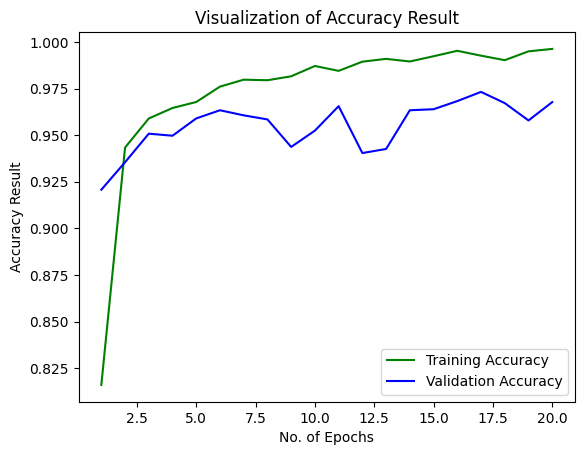

In [30]:
epochs = [i for i in range(1,21)]
plt.plot(epochs,training_history.history['accuracy'],color='green',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [31]:
class_name = validation_set.class_names
class_name

['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy']

In [34]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1829 files belonging to 4 classes.


In [35]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step


(array([[2.94348657e-01, 7.02866912e-01, 4.67044047e-05, 2.73773004e-03],
        [9.99975801e-01, 1.80248899e-05, 2.81645612e-07, 5.96629206e-06],
        [9.10735965e-01, 1.78693663e-02, 1.36375185e-02, 5.77571392e-02],
        ...,
        [2.10278436e-13, 1.95207894e-09, 2.63688654e-11, 1.00000000e+00],
        [1.80091022e-13, 2.44166065e-09, 3.76208127e-11, 1.00000000e+00],
        [9.53596579e-09, 3.55818571e-07, 3.49266500e-08, 9.99999642e-01]],
       dtype=float32),
 (1829, 4))

In [37]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [38]:
predicted_categories

<tf.Tensor: shape=(1829,), dtype=int64, numpy=array([1, 0, 0, ..., 3, 3, 3])>

In [39]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(1829, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)>

In [40]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(1829,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3])>

In [41]:
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.94      0.94       410
                       Corn_(maize)___Common_rust_       1.00      0.97      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.96      0.95       477
                            Corn_(maize)___healthy       0.97      1.00      0.99       465

                                          accuracy                           0.97      1829
                                         macro avg       0.97      0.97      0.97      1829
                                      weighted avg       0.97      0.97      0.97      1829



In [43]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[386,   1,  22,   1],
       [  3, 463,   0,  11],
       [ 20,   0, 456,   1],
       [  0,   0,   0, 465]])

### Confusion Matrix Visualization

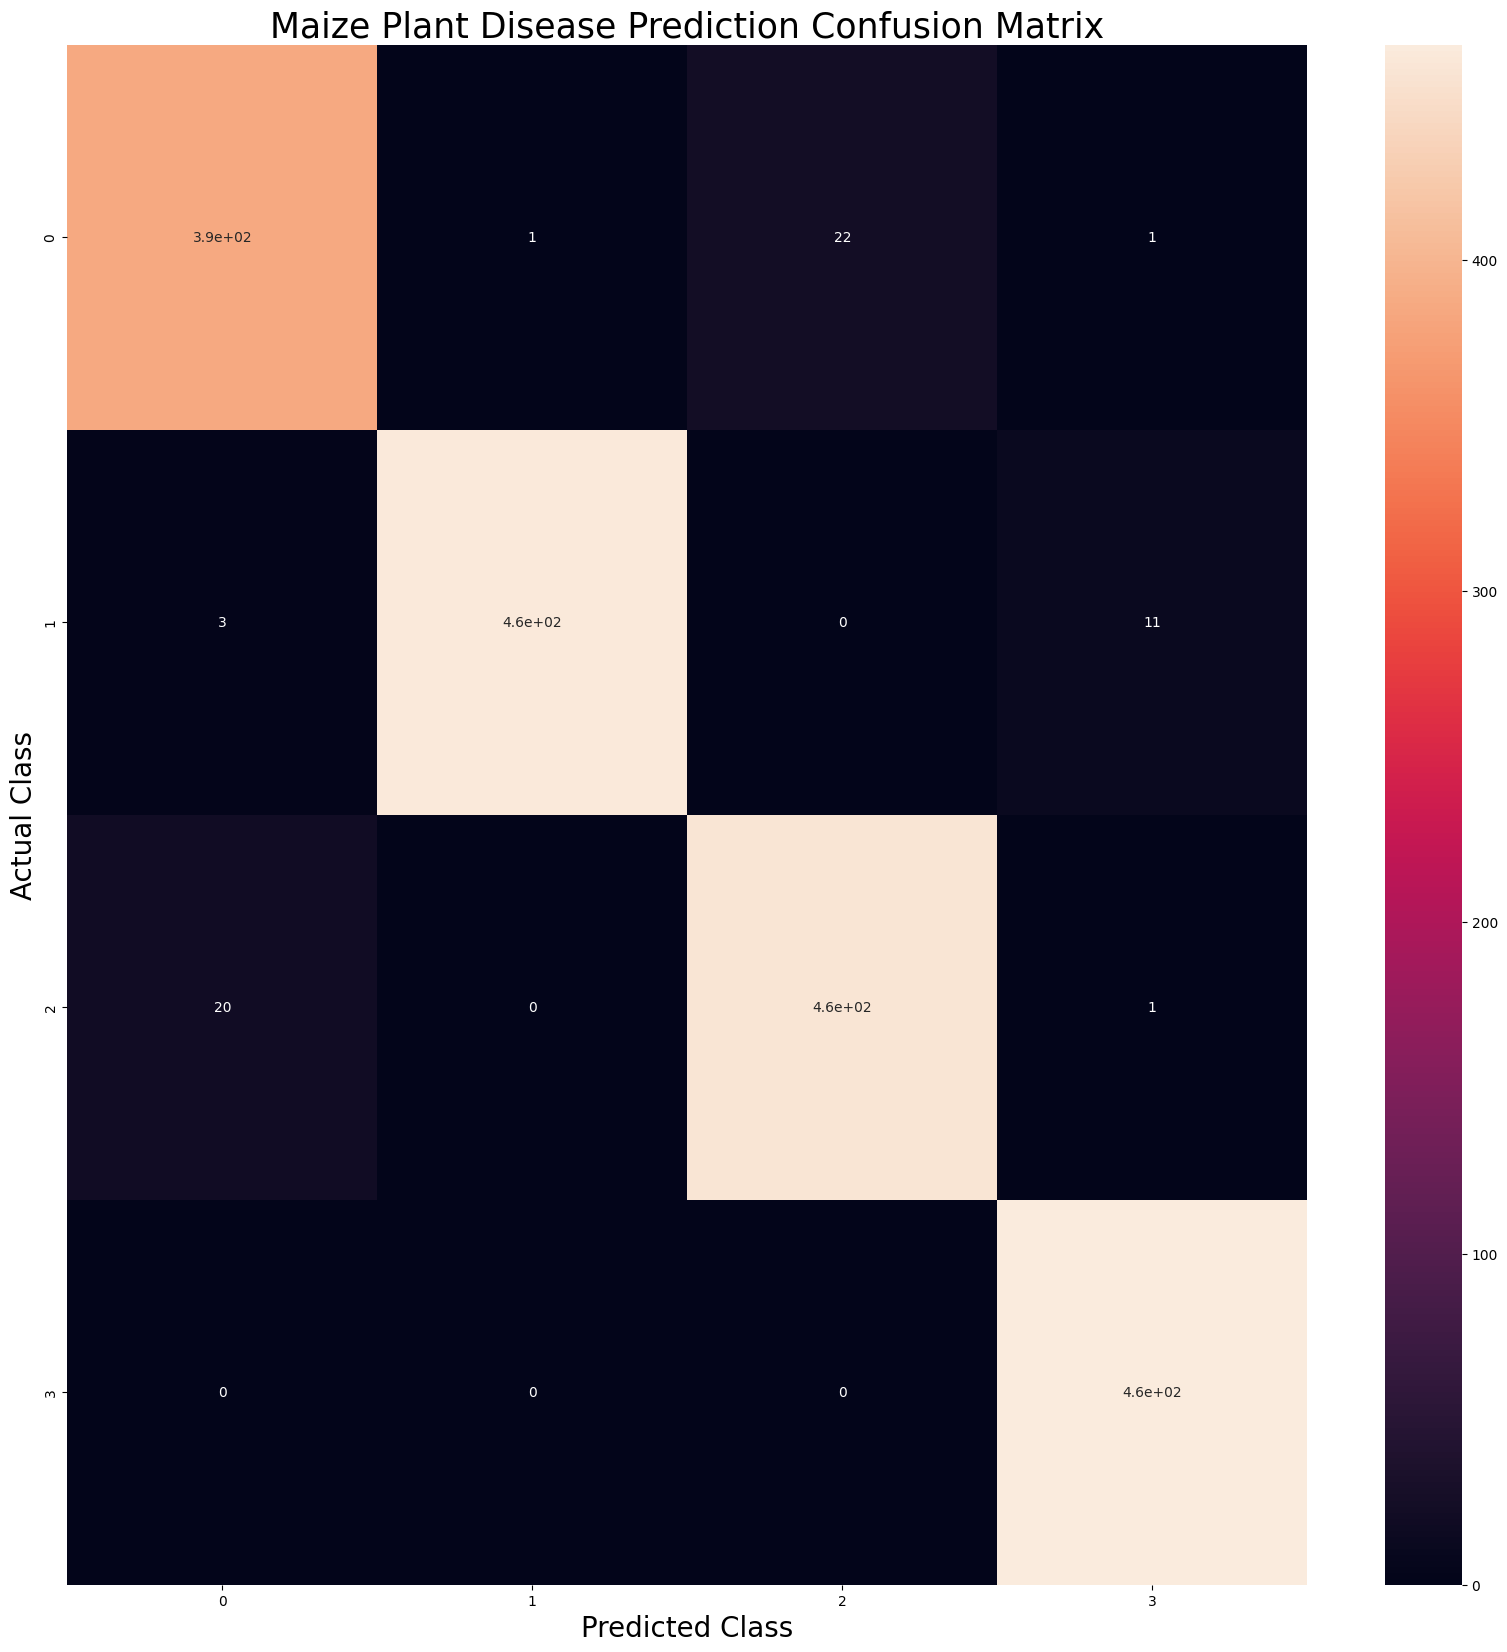

In [46]:
plt.figure(figsize=(20,20))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Maize Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()